# Introduction to geographic data in Python

How do we represent geographic features such as roads, buildings, lakes or mountains on a computer? How can we read an image taken with a satellite sensor and use that in our analyses? How can we create a spatial network that can be used for navigation and finding the fastest route from A to B? This chapter introduces you to the fundamental data structures and formats that are most commonly used when working with Geographic Information Systems (GIS) and spatial data analysis. Geographers and GIS professionals might already be familiar with most of these concepts, but we hope this section helps beginners to grasp the basic concepts essential to understad the approached presented in this part of the book.

Update text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formatsUpdate text about vector data formats## Ways to represent spatial data on a computer

To be able to work with real world geographic objects (such as roads or lakes) on a computer, we need to represented them in a format that the computer can understand and work with. These representations are simplifications of the real world which are typically represented either with **vector** or **raster** *{term}`data model`*. Vector and raster data formats are very different by nature. Figure 5.2 shows how physical objects, such as roads and buildings, can be represented as vectors or rasters. In addition, there are other models which *extend* the previous ones, such as *{term}`spatio-temporal data model`* which incorporates time as one additional dimension to the geographic dimension. There are also models that *integrate* vector or raster data models, such as *{term}`topological data model`* which is typically build around vector data. This model can be used to represent e.g. street **networks** in a way that the topological relationships are incorporated in the core model design, which happens to be very useful for example when aiming to find a shortest route between two locations. 

The vector representation of the road and building features (shown on the left in Figure 5.2) are constructed from points in geographical space which are connected to each other forming lines and polygons. The subplots on the right, shows raster representations of the same features. They are constructed from rectangular cells (also called as pixels) that form a uniform grid, i.e. a raster. The grid is associated to specific geographical location and each cell of the grid contains a value representing some information, such as elevation, temperature or presence/absence (as in this figure). Lastly, the roads on the top-left could be represented as a network, which is a vector-based data structure consisting of intersections (called *nodes*) that are represented as points, and streets connecting the nodes that are represented as lines (called *edges*). Because the vector and raster data models are very different, there are typically a different set of GIS tools and methodologies applied for raster and vector data. However, the vector and raster worlds are not totally isolated from each other, as in many cases it is useful to convert the data from one format to another for specific operations, as has been done in Figure 5.2.
 
![_**Figure 5.2.** Vector and raster representations of roads and buildings._](../img/vector_vs_raster.jpg)

_**Figure 5.2.** Vector and raster representations of roads and buildings._

## Building blocks of vector data

### Geometry types

The most fundamental geometric objects when working with spatial data in vector format are **points**, **lines** and **areas**. Figure 5.3 represents the vector data model and illustrates the variety of geometric objects that are available. `Point` -object represents a single point in geographic space and the location of the point in space is determined with coordinates. Points can be either two-dimensional (with x, y -coordinates) or three dimensional (with x, y, and z coordinates). A single pair of coordinates forming a point is commonly called as *`coordinate`* *{term}`tuple`*. `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples. `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring (called `LinearRing`) and a possible list of holes (as seen in the last plot of Figure 5.3) It is also possible to have a collection of geometric objects (i.e. multiple points, lines or areas) represented as `MultiPoint`, `MultiLineString` and `MultiPolygon` as shown in the bottom row of Figure 5.3. Geometry collections can be useful for example when you want to present multiple building polygons belonging to the same property as a single entity (like a Finnish summer house that typically has a separate sauna building). In addition to these, you might sometimes hear about other geometry objects, such as `Curve`, `Surface` or `GeometryCollection`, but these are basically implemented by the same `Point`, `LineString` and `Polygon` geometry types, hence we don't really use them in practice. 

All of these geometries are defined in *Simple Features Access Specification* ({cite}`Herring_2011`), which is a standard (ISO 19125-1) formalized by the *Open Geospatial Consortium* and *International Organization for Standardization*. Most (if not all) programming languages follow this same standard to represent spatial data. The text underneath each geometry (e.g. `Point (25 60.5)`) shows how each of these geometries can be represented as text (Figure 5.3). The way the text is formatted follows a specification called *{term}`Well-known text` (WKT)* which is also defined in the Simple Features Access Specification. The geometries can also be represented in binary format, which is called  *{term}`Well-known binary` (WKB)*. WKB is useful for storing the geometries in a more compact form, but it is not human-readable. Most often, you don't need to worry about these technical details when working with spatial data in Python, but it is useful to know the foundations underlying most (if not all) GIS libraries.

![_**Figure 5.3**. Vector data model following the Simple Features Access Specification._](../img/vector_data_model.jpg)

_**Figure 5.3**. Vector data model following the Simple Features Access Specification._


### Attribute data

The geometry of a feature is one aspect of geospatial data which tells us about the location and possibly the shape of the real-world entity at hand. However, the other aspect which is equally important is the information that we associate with the geometry as an attribute data. Attribute data is typically attached to the geometries that describe the given entity with various possible characteristics. For example, in terms of a building geometry, we might have useful attribute information associated to the building, such as the number of floors, the height of the building, or how many people live there. In fact, we have already worked with this kind of attribute data in Part I of the book, when we worked with `pandas` DataFrames and analyzed the temperature observations. The DataFrame containing relevant information about the phenomena that we are analyzing (such as the temperature patterns) can be called as an attribute table, which is commonly used term in GIS softwares. Attributes are always linked to the geometries in one way or another: for example based on a unique feature identifier which is referenced both in the attribute table and the geometry records (e.g. when working with `Shapefiles`). The linking can also be done on a structural level of the data, such as in `GeoJSON` format in which a single feature always contains both the geometry information as well as the properties of the data (i.e. attributes associated with the geometry).  

### Vector data formats

Spatial vector data can be stored in different ways. Two of the most widely used approaches is to either store the data into a spatial data file that is stored to disk, or store the data into a spatially-aware database, such as PostGIS database that supports storing spatial data. When storing data to a data file there are multiple options to choose from in terms of data formats. You can easily read and write spatial vector data to approximately eighty different file formats which are supported by the [Geospatial Data Abstraction Library](https://gdal.org/) (GDAL) [^GDAL]. `GDAL` is a computer software library for reading and writing raster and vector geospatial data formats, and it is used under the hood by hundreds of GIS softwares and libraries in different programming languages (including Python). Below, we will provide information about a few selected spatial vector data formats that are commonly used for storing spatial data.  

- **Shapefile:** The shapefile is still widely used data format for storing geospatial vector data, although the file format was developed and introduced by ESRI already in the early 1990s. The filename extension for the Shapefile is `.shp`. Shapefile is not actually only a single file, but it is made of multiple separate files. The three mandatory files that are associated to a valid shapefile dataset are: `.shp` containing the feature geometries, `.shx` containing a positional index for the feature geometries, and `.dbf` containing the attribute information. In addition to these, a shapefile dataset typically includes a `.prj` file which contains information about the coordinate reference system of the dataset. 

- **GeoJSON**: GeoJSON [^geojson] is an open standard format for encoding a variety of geographic data structures along with their attribute data which can be stored into a simple text file. The filename extension for GeoJSON is `.geojson`. The data format extends the widely used JSON format. GeoJSON is human readible and the data is not compressed, hence the files can get large when storing more complex geometries. Because of this, another variation of GeoJSON was developed called `TopoJSON` which is a more compact format. TopoJSON stores the geometries in a way that they can be referenced multiple times in the file, e.g. when two polygons share a common border between them. An example of GeoJSON data structure:

```
{"type": "FeatureCollection", 
    "features": [
        {"type": "Feature", "properties": {"id": 75553155, "timestamp": 1494181812},
        "geometry": {"type": "MultiLineString", "coordinates": [[[26.938, 60.520], [26.938, 60.520]], [[26.937, 60.521], [26.937, 60.521]], [[26.937, 60.521], [26.936, 60.522]]]}
        }, 
        {"type": "Feature", "properties": {"id": 424099695, "timestamp": 1465572910}, 
        "geometry": {"type": "Polygon", "coordinates": [[[26.935, 60.521], [26.935, 60.521], [26.935, 60.521], [26.935, 60.521], [26.935, 60.521]]]}
        }
    ]
}

```

- **GeoPackage:** A GeoPackage (GPKG) is an open, non-proprietary, platform-independent, portable and standards-based data format for storing spatial data. In the background, GeoPackage uses a SQLite database container to store the data. The file extension of GeoPackage is `.gpkg` and it was introduced in 2014 by Open Geospatial Consortium. GeoPackage can be used to store spatial vector data as well as raster data. However, the GeoPackage raster support is limited as it supports only `Byte` data type.    

These three are probably the most widely used file formats to store spatial data in vector format. However, there are numerous other file formats in addition to these, such as *{term}`Keyhole Markup Language` (KML)* that is commonly used file format to place geographic data on top of [Google Earth](https://en.wikipedia.org/wiki/Google_Earth) [^Google_Earth]. One file format which is still in the making, but a very promising one, is [GeoParquet](https://github.com/opengeospatial/geoparquet) [^GeoParquet] which stores spatial data in [Apache Parquet](https://parquet.apache.org/) [^Parquet]. Apache Parquet is a popular open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk.

Now you should have a basic understanding about the basic building blocks of vector data. In the following parts of the book, you will learn many useful geocomputational and analytical techniques that you can use when working with vector data.  

## Basics of raster data and arrays

In raster data model the data is represented as arrays of cells, also called as pixels, to represent real-world objects or continuous phenomena (it is basically a two-dimensional array or a matrix). In fact, you are most likely already familiar with raster data as photographs taken with a digital camera are basically stored as raster data. Digital cameras typically capture the world using Red, Green and Blue (RGB) colors and stores this information in pixels as individual layers (as called as *{term}`band`s* or `channels`) for each color. When these layers of red, green and blue colors are combined, we get a photograph as we have used to see them. In a similar manner, we can store other information to pixels, such as elevation or temperature data (which have only one layer or `band`), or more detailed spectral information that capture how the light reflects from objects on earth at different wave-lengths (which is what e.g. satellite sensors do). In these cases, we might have tens or even hundreds of different bands (as with hyperspectral imaging) that record very detailed information about how the light reflects from the earth at different wave lengths, including Red, Green and Blue, but also many more such as near infrared (NIR), or long-wave infrared (LWIR) which is commonly used to monitor temperatures. 

Each cell in the raster dataset typically contains a value as shown on the left in Figure 5.4 (although the cell value can also be `NoData`). This is different compared to vector data, in which the geometries (observations) can be unevenly distributed across space, although it is possible to also represent a regular grid with polygons, it is just much less efficient computationally. Each cell value also has an index (i.e. position) that can be accessed based on row and column numbers. For instance, the value (*11*) from the bottom-left corner cell can be accessed at index `(3,0)` in which the first number is the row number and the second is the column number. Cell values can be plotted by given a color according a specific *{term}`colormap`* (see the legend on the right) which turns the data into more understandable format, making it possible to detect patterns or trends from the data. For example in Figure 5.4, it is easy to detect that there is a cluster of high values on the bottom right corner. Detecting this pattern just by looking at cell values on the left is much more difficult task, especially if you would have much bigger raster than what we have here (4x4 grid). Also a basic feature of raster data is that the cell size of the grid can vary. For example, the Figure 5.4 and the top-right subplot in Figure 5.2 represents the data with 10 meter *{term}`spatial resolution`*, i.e. the size of an individual cell is 10 by 10 meters. However, the bottom-right subplot in Figure 5.2 represents the buildings with 1 meter spatial resolution. This is an important aspect when working with raster data, because the spatial resolution determines how accurately the real-world entities, such as buildings or topographic features, can be represented or identified from the data. Raster data is commonly used to represent e.g. satellite imagery, digital elevation models and other type of data, in which the spatial extent of the data is large (covering e.g. whole countries, continents or the world) with continuous measurements across the space. It is good to be awere though, that it is also possible to store discrete or categorical data to a raster, such as landuse classification data. Raster data is commonly used e.g. for environmental monitoring, meteorology and cartography. 

![_**Figure 5.4**. Raster data model._ ](../img/raster_data_model.jpg)
_**Figure 5.4**. Raster data model._

One fundamental way to characterize a raster dataset is based on their *{term}`bit depth`* (also called as *{term}`pixel depth`*). The bit depth defines the range of distinct values that the raster can store. For example, a 1-bit raster can only store 2 distinct values: 0 and 1, whereas 8-bit raster can have 256 different values that range between 0 to 255, as shown in Figure 5.5. 

![_**Figure 5.5**. Raster bit depths._](../img/raster_bit_depths.jpg)
_**Figure 5.5**. Rater bit depths._


### Commonly used raster data formats

Similarly as with vector data, also raster data can be stored in various different formats. Below we list a few of the most commonly used ones.

- **GeoTIFF**: A popular public domain raster data format is the GeoTIFF format. If maximum portability and platform independence is important, this file format may be a good choice.
- **Imagine**: The Imagine file format was originally created by an image processing software company called ERDAS. This file format consists of a single `.img` file. The file is sometimes accompanied by an .xml file which usually stores metadata information about the raster layer.

Now you should know the basics raster data, and in Chapters 7-9 as well as in Chapter 12, you will learn many useful techniques that you can use when working with raster data. 

## Representing spatial networks

Networks are everywhere. Social networks, telecommunication networks, neural networks, and transportation networks are all familiar examples how the networks surround us and are very essential to our everyday life. No surprise then, that studying complex networks has grown to be a very important topic in various fields of science including biology, medical sciences, social science, engineering, geography and many others. In this book, we will focus on spatial networks that can represent for example street networks (one of the most typical examples). In Figure 5.2, we saw a simple street network represented as a collection of `LineStrings`. Although this representation can already be used to visualize the network, it does not yet allow to do analysis with it. For this, we need to create a `Network` data stucture with topology. Before showing how to do this, let's go through some basic concepts about networks (or graphs, as they are also commonly called).  

### Network structure

Graphs are, in principle, very simple data structures, and they consists of:

 1. **nodes** (e.g. intersections on a street, or a person in social network), and
 2. **edges** (a link that connects the nodes to each other)
 
A simple graph could look like this:

![_**Figure 5.5.** A simple graph._](../img/graph_elements.png)
_**Figure 5.5.** A simple graph._

Here, the letters `A, B, C, D, and E` are nodes and the lines that goes between them are edges/links. 


### Node and Edge attributes

In terms of street networks, nodes typically contain the geographical information associated with the graph (i.e. coordinates of the intersection). Edges typically contain much more information. They e.g. contain information about **which nodes are connected to each other**, and what is the **cost** to travel between the nodes (e.g. time, distance, CO2, etc.). It is also possible to associate geographical information to edges (if you e.g. want to show how the roads are curved between intersections), but for basic travel time analyses this is not needed. 

![_**Figure 5.6**. Weighted graph._](../img/graph_weights.png)
_**Figure 5.6**. Weighted graph._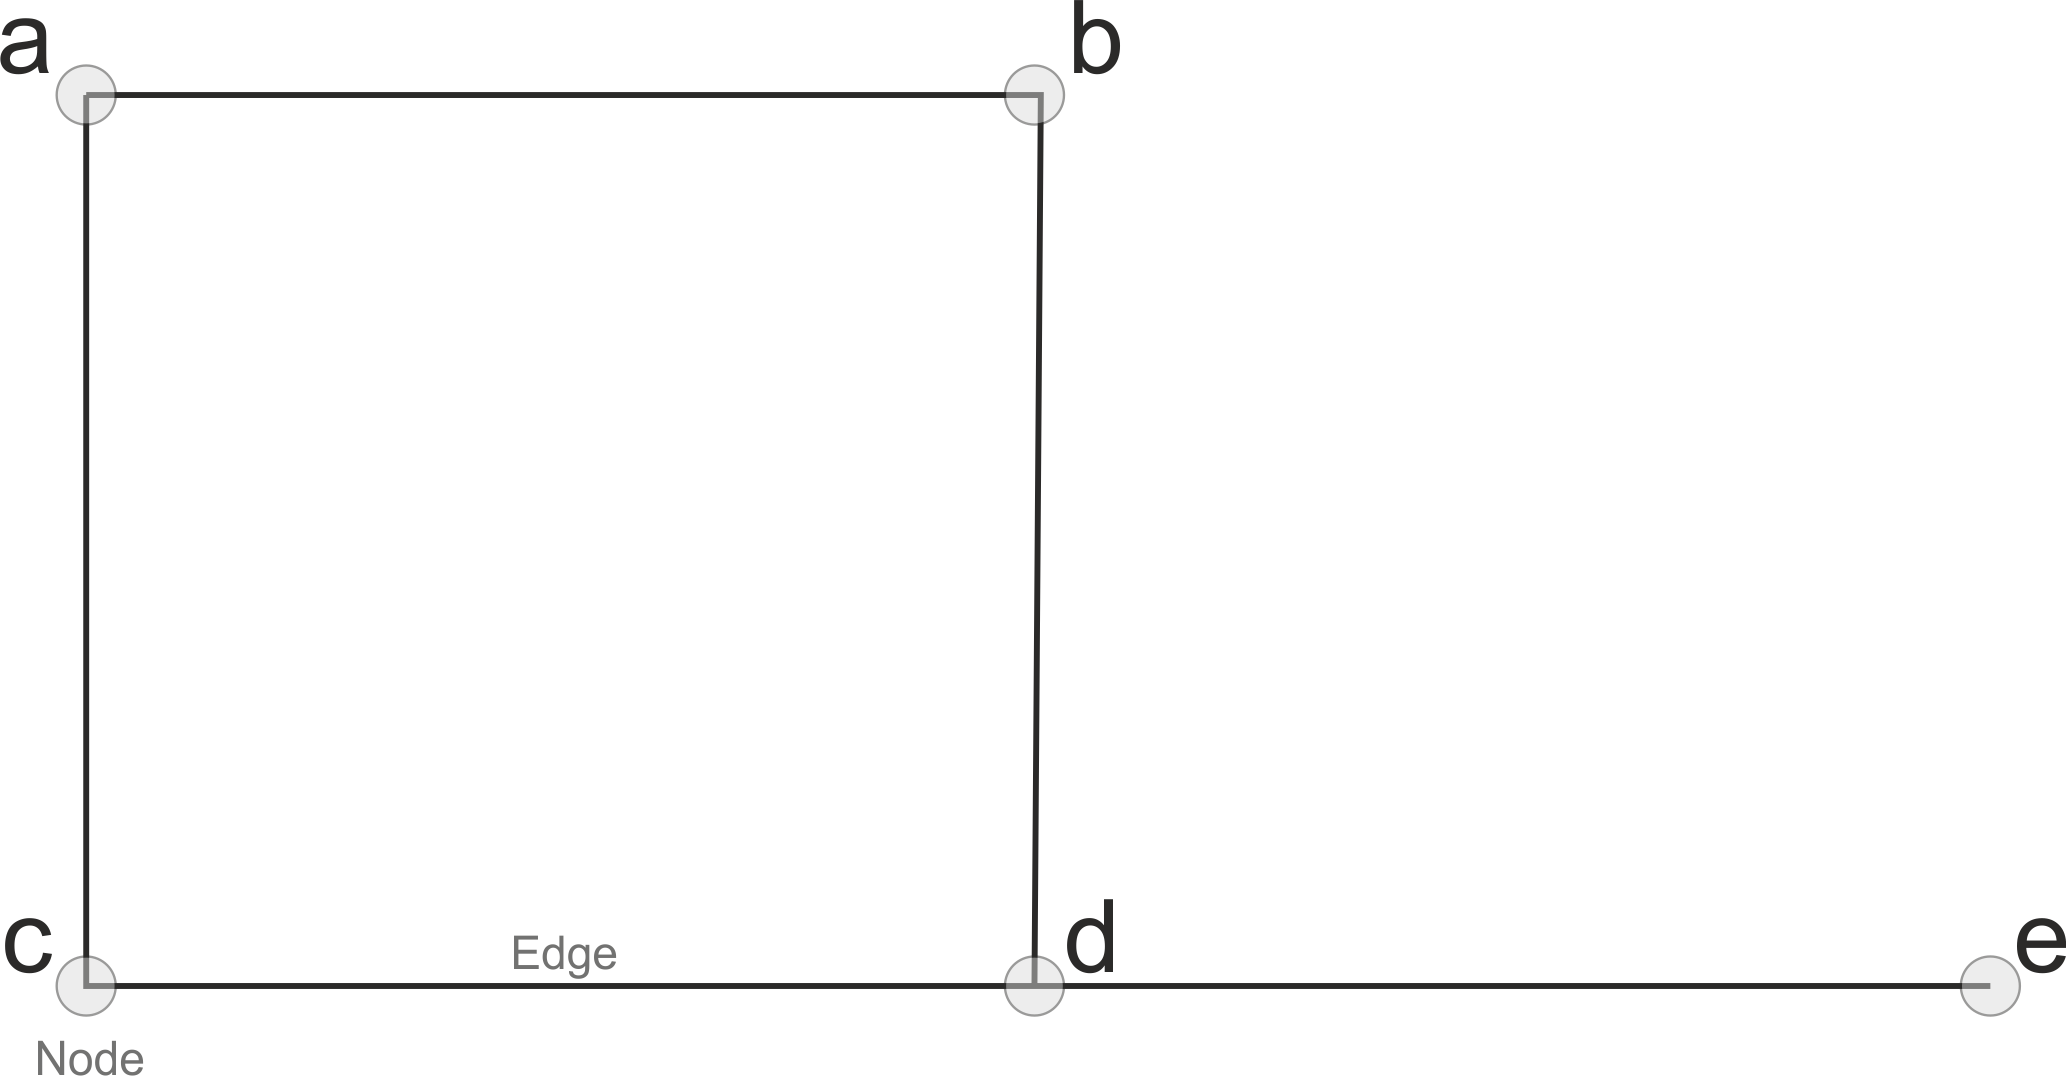

### Directed vs Undirected graphs

Graphs can be **directed** or **undirected**, which basically determines whether the roads can be travelled to any direction or whether the travel direction is restricted to certain direction (e.g. a one-way-street). 
In **undirected** graph, it is possible to travel in both directions between nodes (e.g. from `A --> C` and from `C --> A`). Undirected graphs are typically used e.g. with walking and cycling as with those travel modes it is typically possible to travel the same street in any direction you like. 

![_**Figure 5.7**. Directed graph._](../img/directed_graph.png)
_**Figure 5.7**. Directed graph._

If the graph is **directed**, it means that you should have a separate edge for each direction. If you for example have a graph with only an edge that goes from `D` to `E`, you can travel to node `E` from `D` but you cannot travel back. In directed graphs, **you need to have a separate edge for each travel direction**. Fundamentally this means that for a bi-directional road, you should have edges in your data (i.e. two separate rows), such as:


| edge_id | from_node | to_node| description |
|---------|-----------|--------|-------------|
|1| A| C |  *edge for direction 1* |
|2| C| A |  *edge for direction 2* |

Now you should have a basic understanding about the elements of a (spatial) network. In chapter 11, we will see how to create a spatial network in practice using a library called `networkx`, and how to do simple network analyses in Python.  

## Footnotes

[^GDAL]: <https://gdal.org/>
[^geojson]: <https://en.wikipedia.org/wiki/GeoJSON>
[^GeoParquet]: <https://github.com/opengeospatial/geoparquet>
[^GEOS]: <https://trac.osgeo.org/geos>
[^Google_Earth]: <https://en.wikipedia.org/wiki/Google_Earth>
[^Parquet]: <https://parquet.apache.org/>
[^QGIS]: <http://www.qgis.org/en/site/>